In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import GridSearchCV,cross_val_score, train_test_split
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, mean_squared_error,r2_score, accuracy_score,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.svm import SVR

# Import and Loading Dataset

In [3]:
covid_df = pd.read_csv("C:\covid.csv")
covid_df

,country,country_code,year_week,level,region,region_name,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source
0,Austria,AT,2020-W01,national,AT,Austria,NaN,NaN,8978929,NaN,NaN,NaN
1,Austria,AT,2020-W02,national,AT,Austria,NaN,NaN,8978929,NaN,NaN,NaN
2,Austria,AT,2020-W03,national,AT,Austria,NaN,NaN,8978929,NaN,NaN,NaN
3,Austria,AT,2020-W04,national,AT,Austria,NaN,NaN,8978929,NaN,NaN,NaN
4,Austria,AT,2020-W05,national,AT,Austria,NaN,NaN,8978929,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5305,Sweden,SE,2023-W16,national,SE,Sweden,1171.0,7202.0,10452326,68.903324,16.259372,TESSy COVID-19
5306,Sweden,SE,2023-W17,national,SE,Sweden,1051.0,6659.0,10452326,63.708308,15.783151,TESSy COVID-19
5307,Sweden,SE,2023-W18,national,SE,Sweden,947.0,5973.0,10452326,57.145175,15.854679,TESSy COVID-19
5308,Sweden,SE,2023-W19,national,SE,Sweden,921.0,6035.0,10452326,57.738345,15.260978,TESSy COVID-19


# Data Exploration

In [5]:
# Checking the columns
covid_df.columns

Index(['country', 'country_code', 'year_week', 'level', 'region',
       'region_name', 'new_cases', 'tests_done', 'population', 'testing_rate',
       'positivity_rate', 'testing_data_source'],
      dtype='object')

In [6]:
# data type of each colum 
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5340 entries, 0 to 5339
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              5340 non-null   object 
 1   country_code         5340 non-null   object 
 2   year_week            5340 non-null   object 
 3   level                5340 non-null   object 
 4   region               5340 non-null   object 
 5   region_name          5340 non-null   object 
 6   new_cases            5151 non-null   float64
 7   tests_done           4303 non-null   float64
 8   population           5340 non-null   int64  
 9   testing_rate         4303 non-null   float64
 10  positivity_rate      4281 non-null   float64
 11  testing_data_source  4303 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 500.8+ KB


# Checking statictics of the covid dataframe

In [7]:
covid_df.describe()

,new_cases,tests_done,population,testing_rate,positivity_rate
count,5.151000e+03,4.303000e+03,5.340000e+03,4303.000000,4281.000000
mean,3.642024e+04,3.954342e+05,1.508587e+07,3987.001386,12.591212
std,1.256580e+05,9.033010e+05,2.122189e+07,9069.670720,13.700551
min,0.000000e+00,1.000000e+00,3.930800e+04,0.005251,0.000000
25%,8.405000e+02,1.743550e+04,2.107180e+06,415.331869,2.624828
50%,4.287000e+03,6.776000e+04,6.356178e+06,1361.984618,7.683486
75%,2.035200e+04,3.091710e+05,1.161762e+07,3176.259614,17.793103
max,2.486551e+06,8.832046e+06,8.323712e+07,88766.711486,95.028958


# Check Null values

In [8]:
# count the number of missing values in each column
missing_values_count = covid_df.isnull()
missing_values_count

,country,country_code,year_week,level,region,region_name,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source
0,False,False,False,False,False,False,True,True,False,True,True,True
1,False,False,False,False,False,False,True,True,False,True,True,True
2,False,False,False,False,False,False,True,True,False,True,True,True
3,False,False,False,False,False,False,True,True,False,True,True,True
4,False,False,False,False,False,False,True,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
5335,False,False,False,False,False,False,False,False,False,False,False,False
5336,False,False,False,False,False,False,False,False,False,False,False,False
5337,False,False,False,False,False,False,False,False,False,False,False,False
5338,False,False,False,False,False,False,False,False,False,False,False,False


Form the above we can see that the data has some missing values for the columns new_cases ,tests_done, testing_rate,positivity_rate and testing data source. We need to clean the dataset in order to make it ready to use them for the ML algorithms.

Generally there are 2 methods named dropna(), fillna() by which we can clean the Null values. Since wew are using the real time data, we are dropping the rows that contains missing values.

In [9]:
# drop null value rows and reset index
covid_df = covid_df.dropna().reset_index(drop=True)

In [10]:
covid_df.head()

,country,country_code,year_week,level,region,region_name,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source
0,Austria,AT,2020-W41,national,AT,Austria,7487.0,124663.0,8978929,1388.394986,6.005792,TESSy COVID-19
1,Austria,AT,2020-W42,national,AT,Austria,9898.0,129647.0,8978929,1443.902719,7.634577,TESSy COVID-19
2,Austria,AT,2020-W43,national,AT,Austria,18262.0,158997.0,8978929,1770.779121,11.485751,TESSy COVID-19
3,Austria,AT,2020-W44,national,AT,Austria,31613.0,167926.0,8978929,1870.223052,18.825554,TESSy COVID-19
4,Austria,AT,2020-W45,national,AT,Austria,44772.0,199567.0,8978929,2222.614746,22.434571,TESSy COVID-19


# Data Visualization

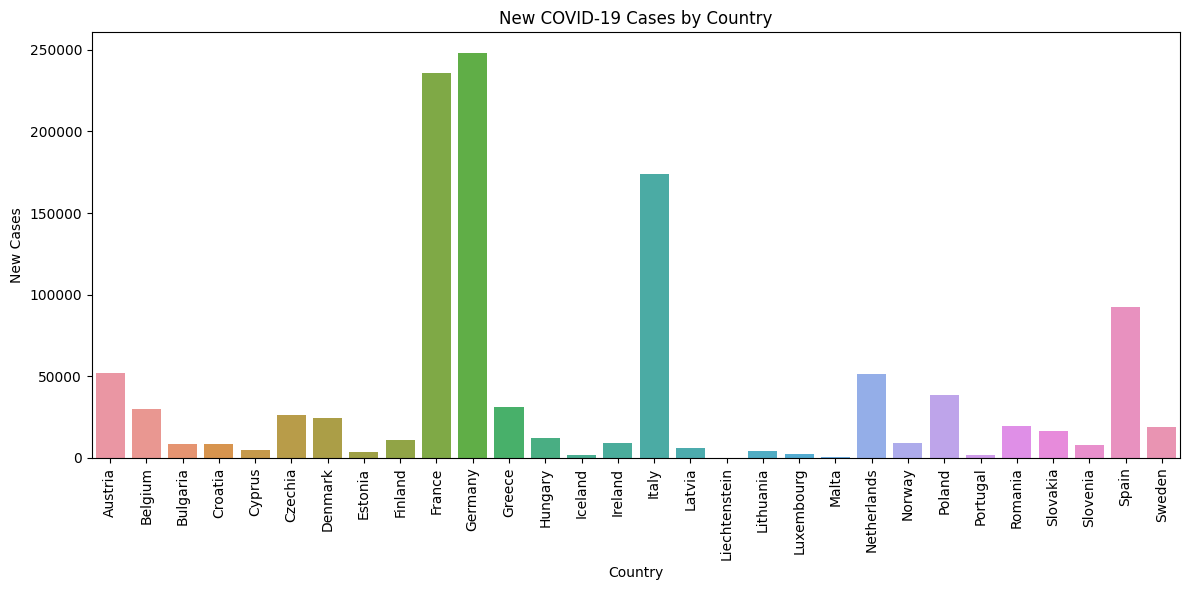

In [12]:
# Visuvalizing the total number of new cases per country
plt.figure(figsize=(12, 6))
sns.barplot(data=covid_df, x='country', y='new_cases',errorbar=None)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('New Cases')
plt.title('New COVID-19 Cases by Country')
plt.tight_layout()
plt.show()

From the above we see that the data contains some outliers

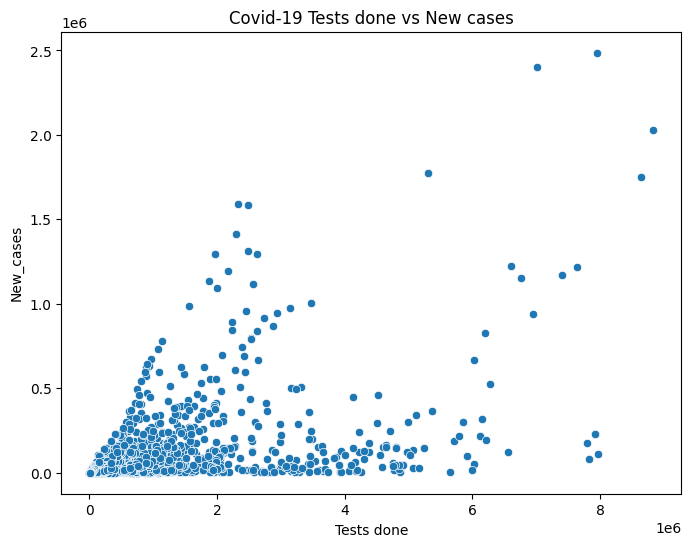

In [13]:
# Visuvalising the new cases per test done byusing scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=covid_df, x='tests_done', y='new_cases')
plt.xlabel('Tests done')
plt.ylabel('New_cases')
plt.title('Covid-19 Tests done vs New cases')
plt.show()

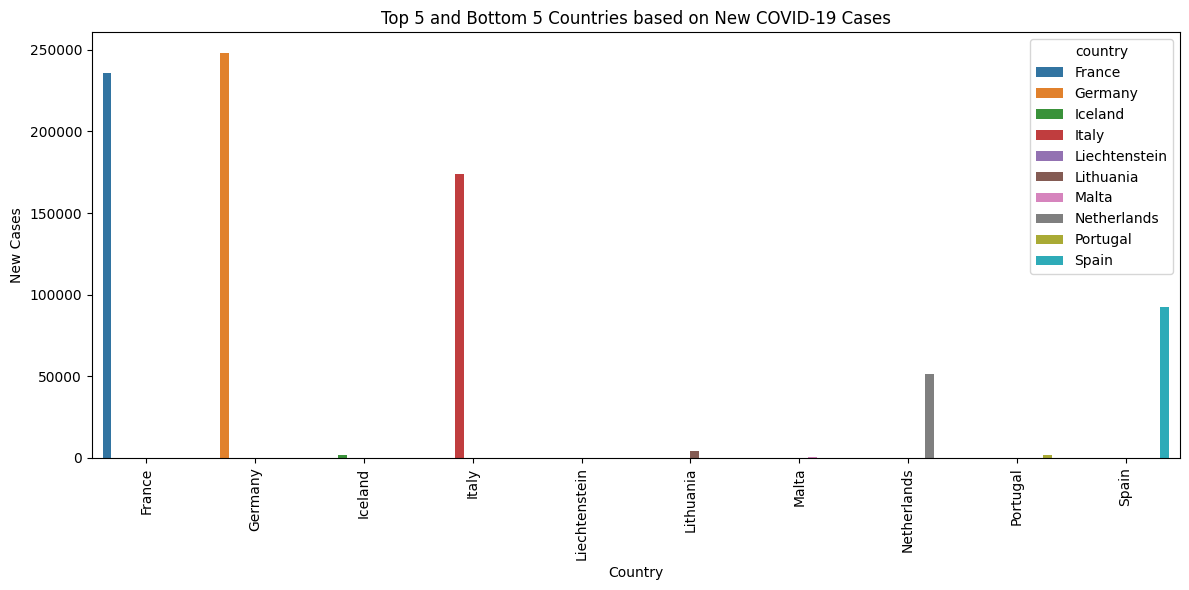

In [14]:
#Here we try to visualise some of the dynamics of top 5 and bottom 5 countries based on the new cases
covid_top_5_countries = covid_df.groupby('country')['new_cases'].sum().nlargest(5).index
covid_bottom_5_countries = covid_df.groupby('country')['new_cases'].sum().nsmallest(5).index

covid_filter_df = covid_df[covid_df['country'].isin(covid_top_5_countries) | covid_df['country'].isin(covid_bottom_5_countries)]

# Bar plot for top 5 and bottom 5 countries
plt.figure(figsize=(12, 6))
sns.barplot(data=covid_filter_df, x='country', y='new_cases', hue='country',errorbar=None)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('New Cases')
plt.title('Top 5 and Bottom 5 Countries based on New COVID-19 Cases')
plt.tight_layout()
plt.show()

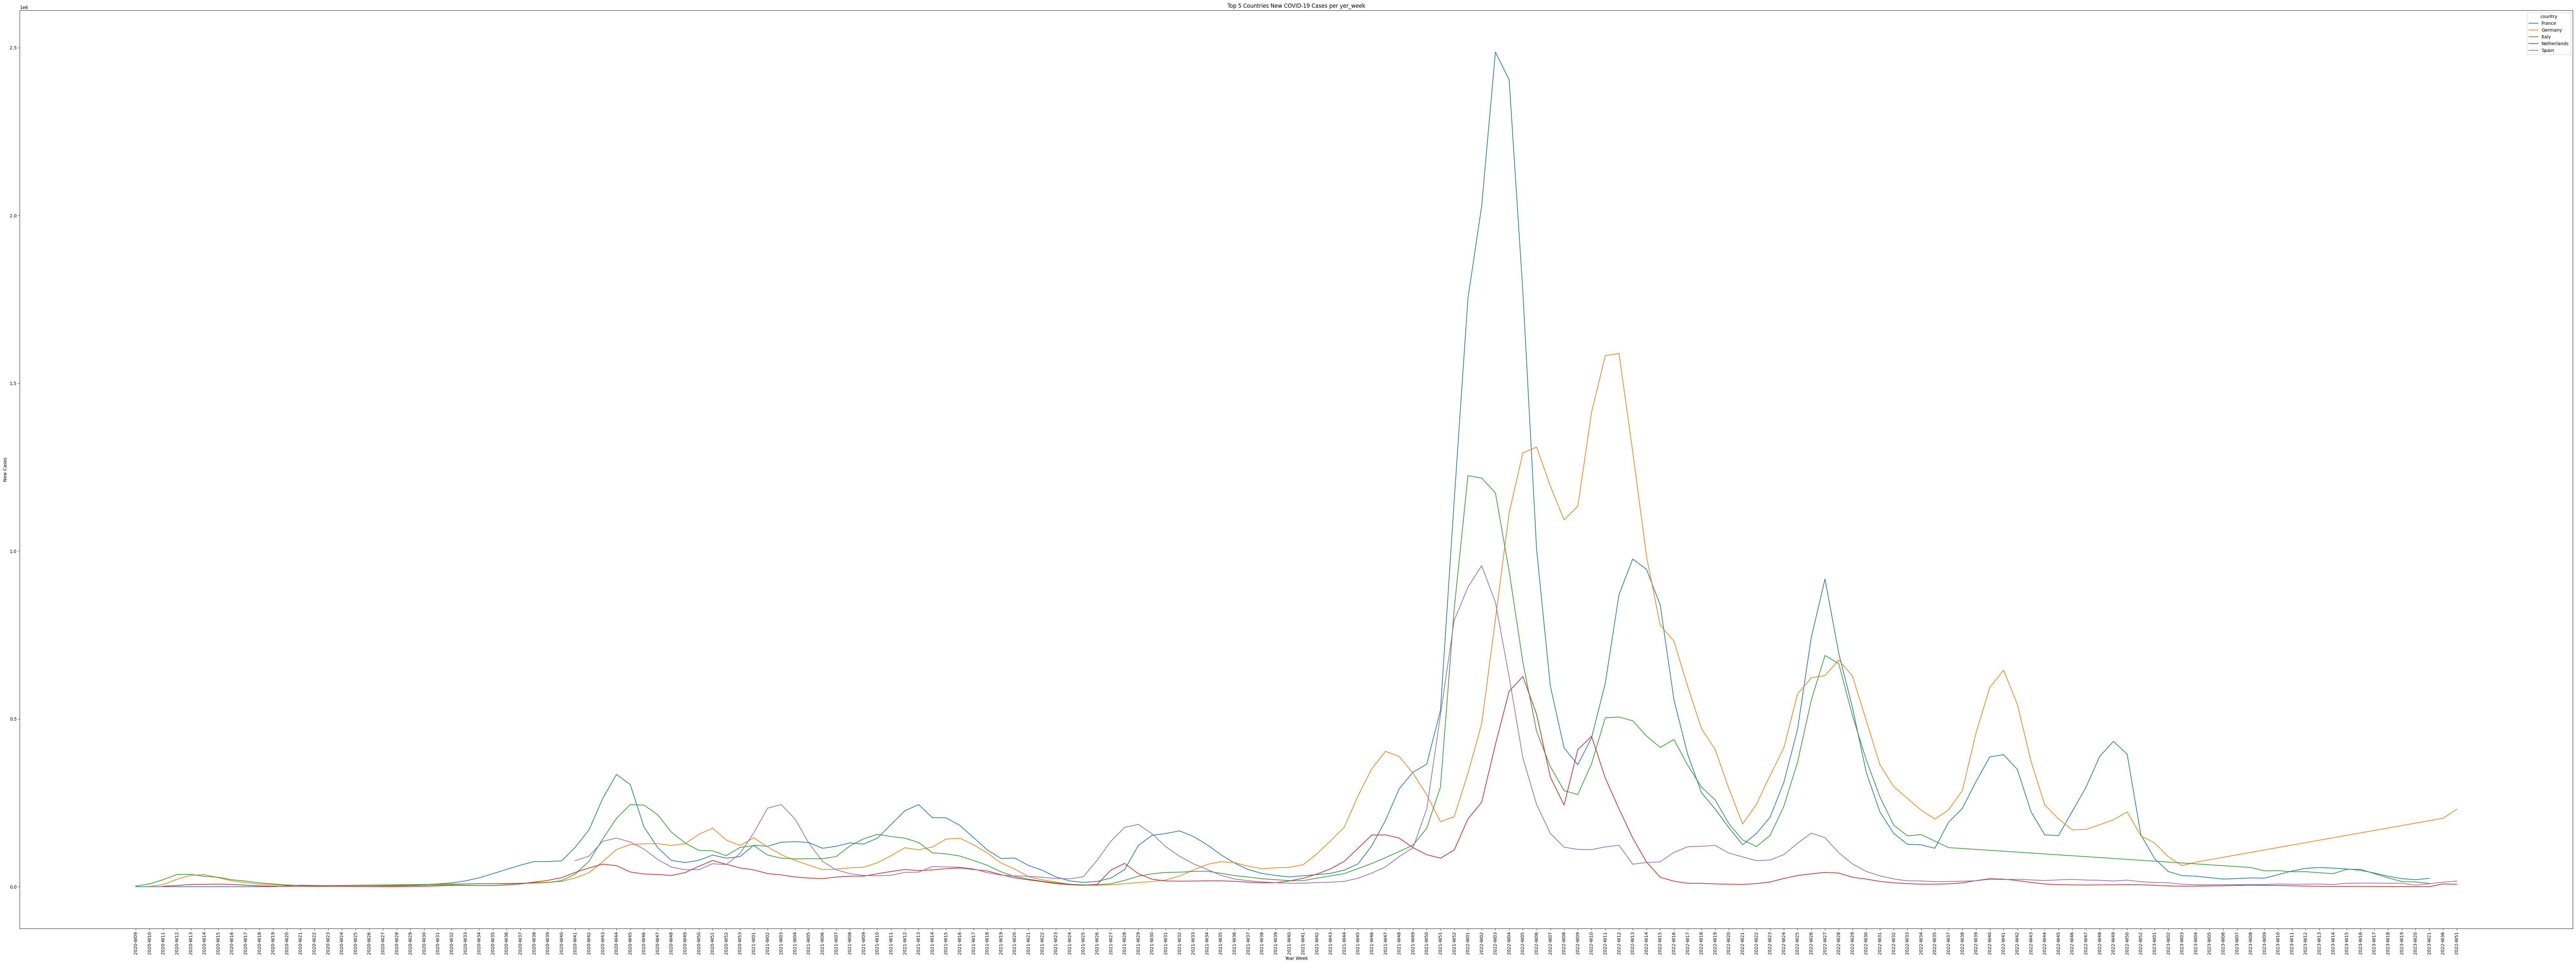

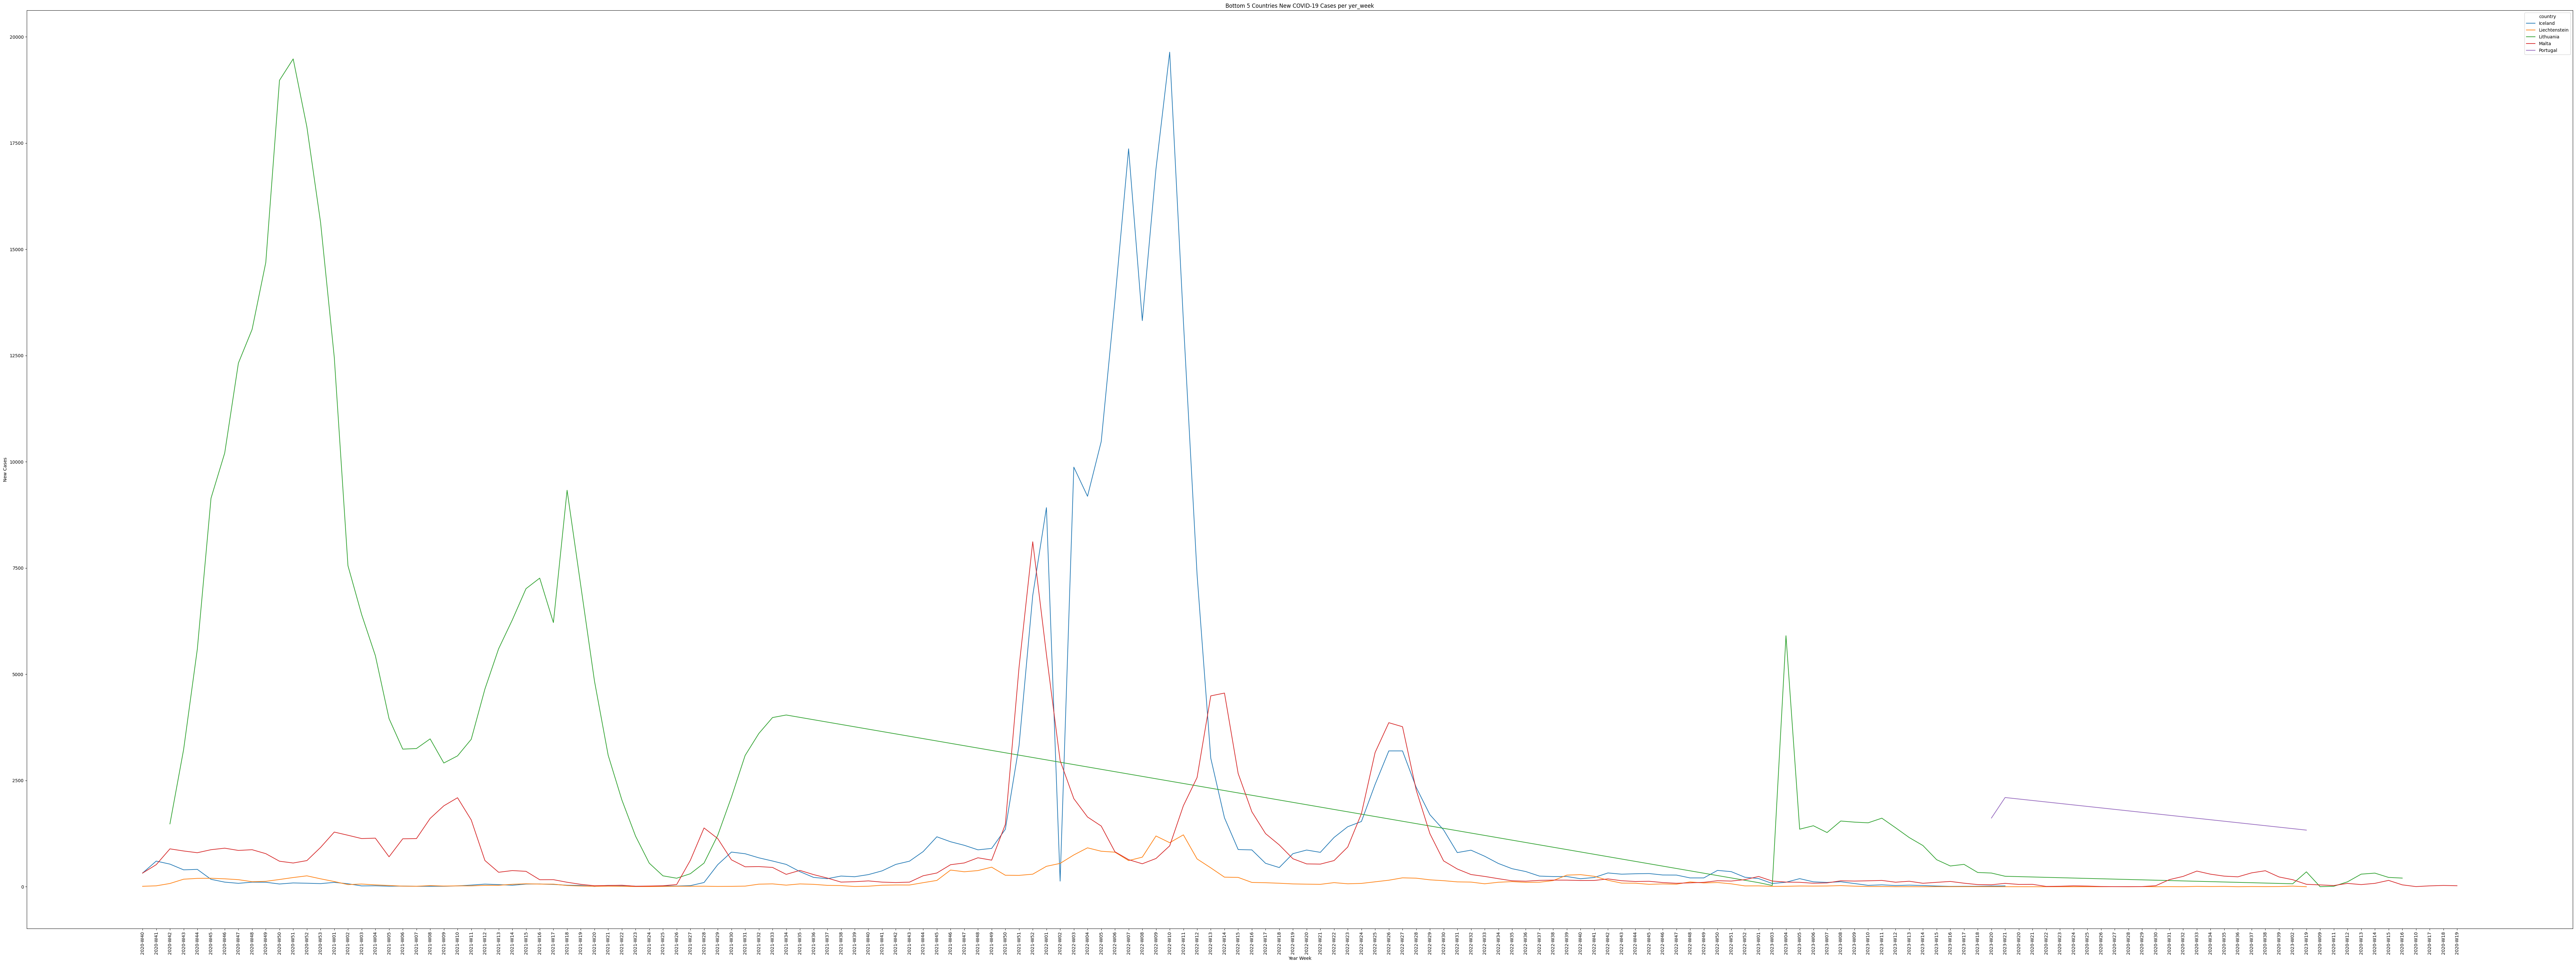

In [15]:
# Line plot for top 5 countries per year_week
plt.figure(figsize=(80,30))
sns.lineplot(data=covid_df[covid_df['country'].isin(covid_top_5_countries)], x='year_week', y='new_cases', hue='country')
plt.xlabel('Year Week')
plt.ylabel('New Cases')
plt.title('Top 5 Countries New COVID-19 Cases per yer_week')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Line plot for bottom 5 countries per year_week
plt.figure(figsize=(80,30))
sns.lineplot(data=covid_df[covid_df['country'].isin(covid_bottom_5_countries)], x='year_week', y='new_cases', hue='country', errorbar=None)
plt.xlabel('Year Week')
plt.ylabel('New Cases')
plt.title('Bottom 5 Countries New COVID-19 Cases per yer_week')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

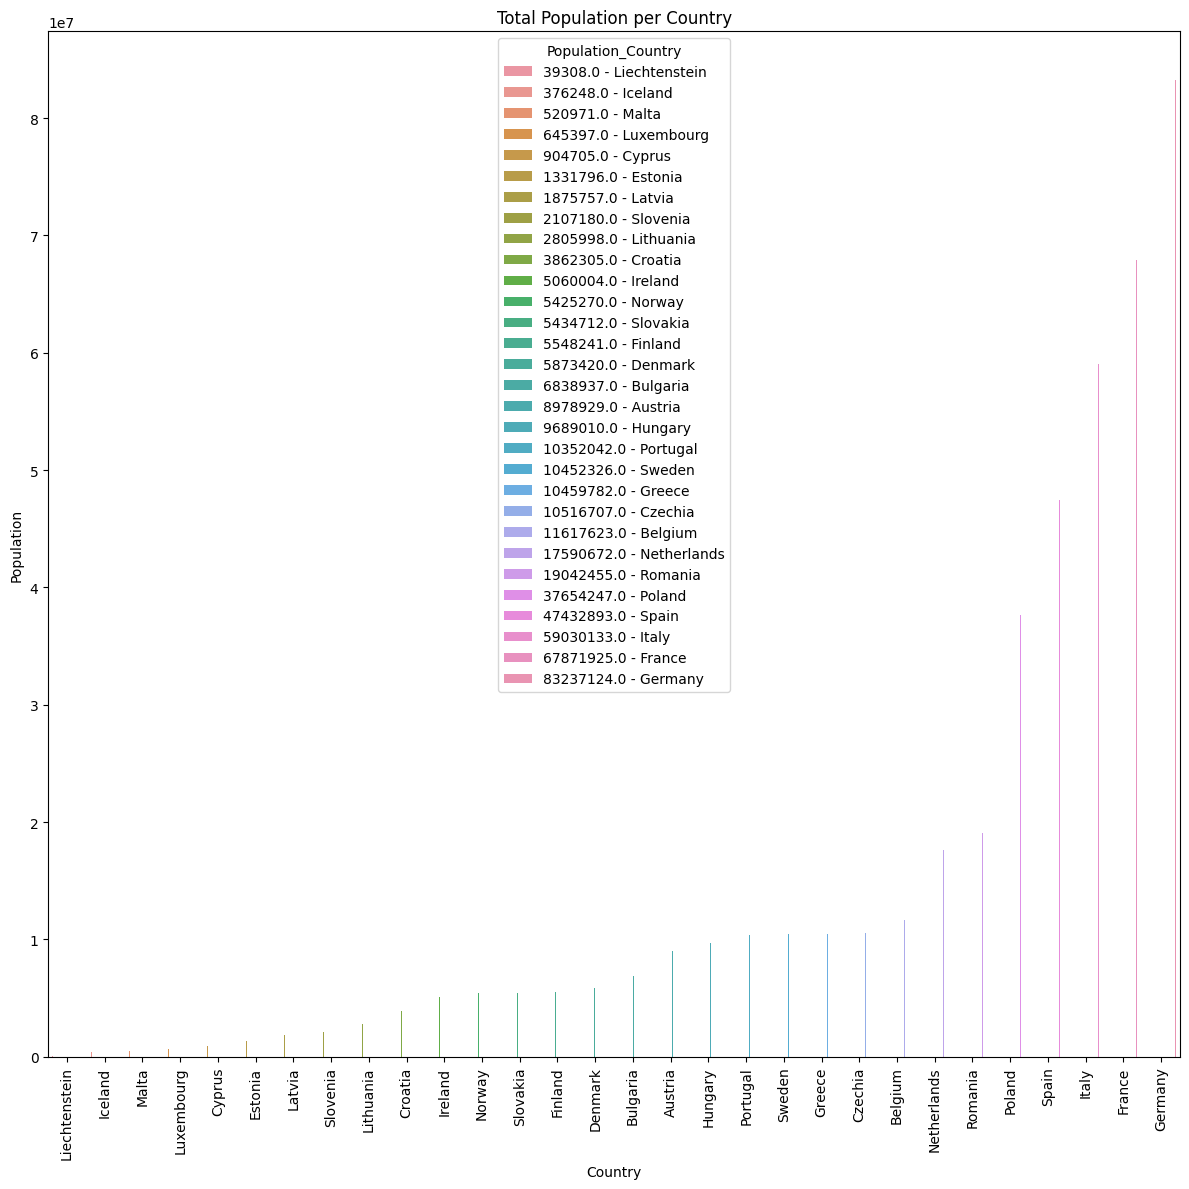

In [16]:
# Plot the barplot for population per country
covid_grouped_df = covid_df.groupby('country')['population'].mean().reset_index()
# To plot based on sorting order
sorted_covid_grouped_df = covid_grouped_df.sort_values('population', ascending=True)
# New column created to combine both'population' and 'country' 
sorted_covid_grouped_df['Population_Country'] = sorted_covid_grouped_df['population'].astype(str) + ' - ' + sorted_covid_grouped_df['country']
plt.figure(figsize=(12, 12))
sns.barplot(data=sorted_covid_grouped_df, x='country', y='population', hue='Population_Country')
plt.title('Total Population per Country')
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

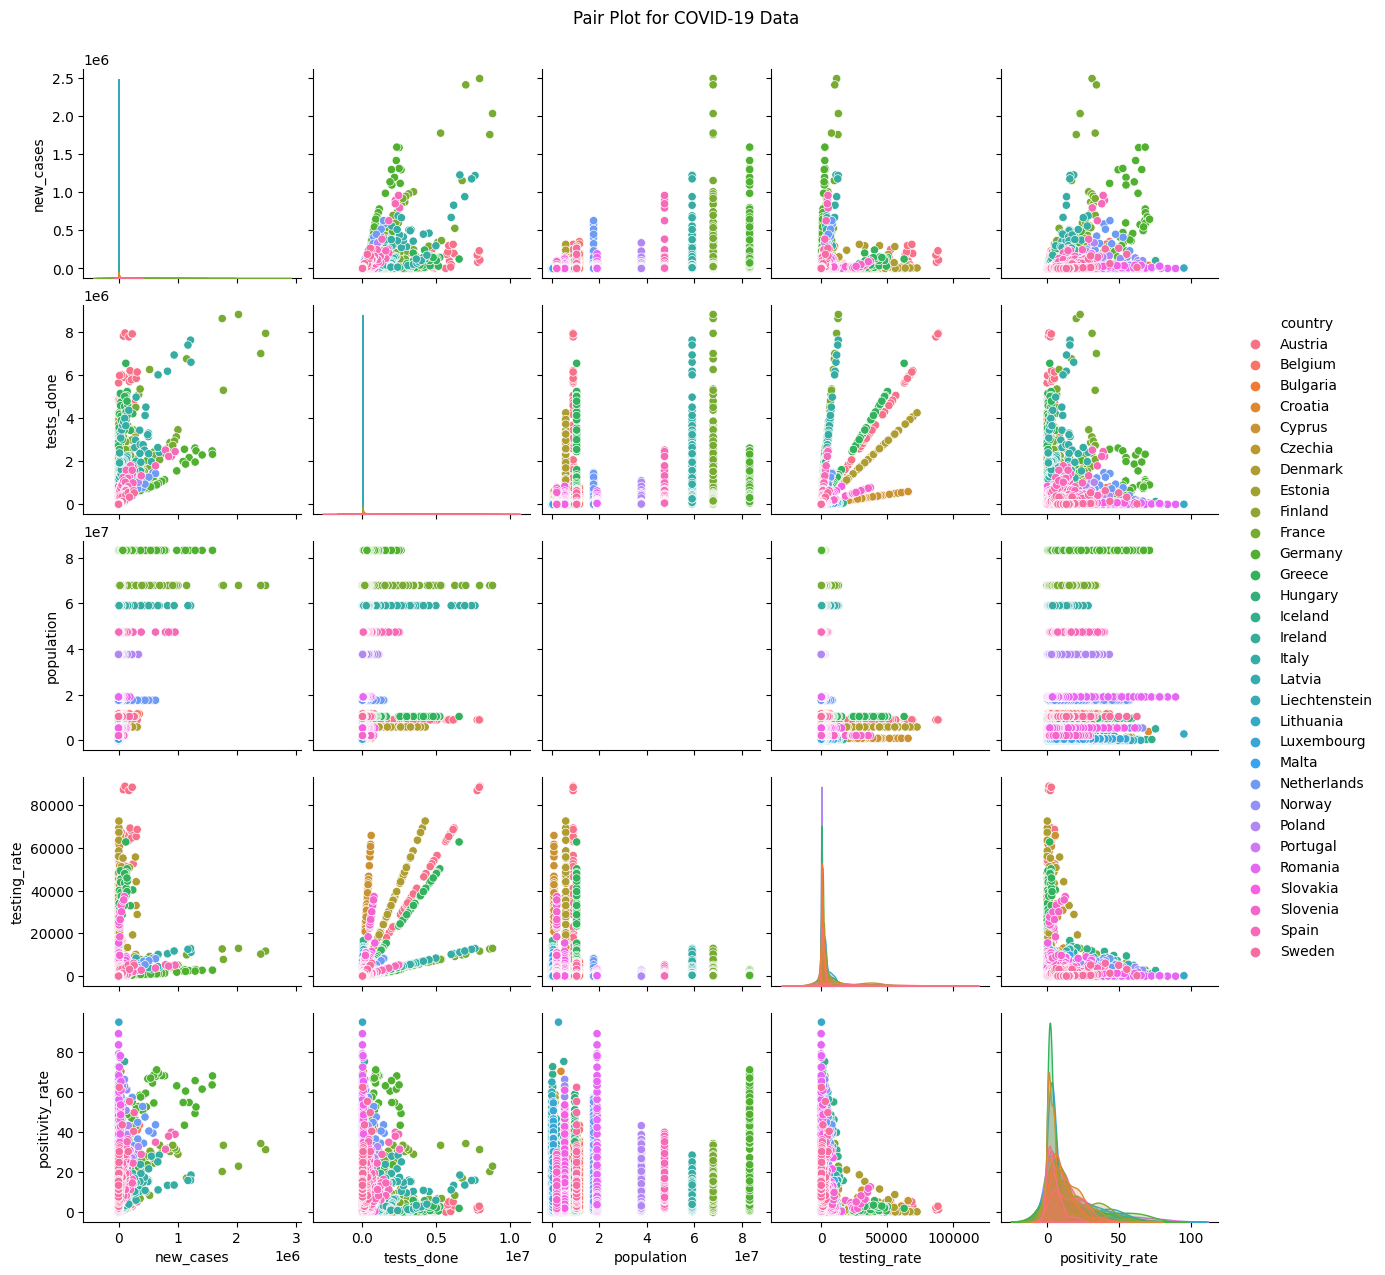

In [17]:
# Seaborn pair plot based on country
sns.pairplot(covid_df,hue='country')
plt.suptitle('Pair Plot for COVID-19 Data', y=1.02)
plt.show()

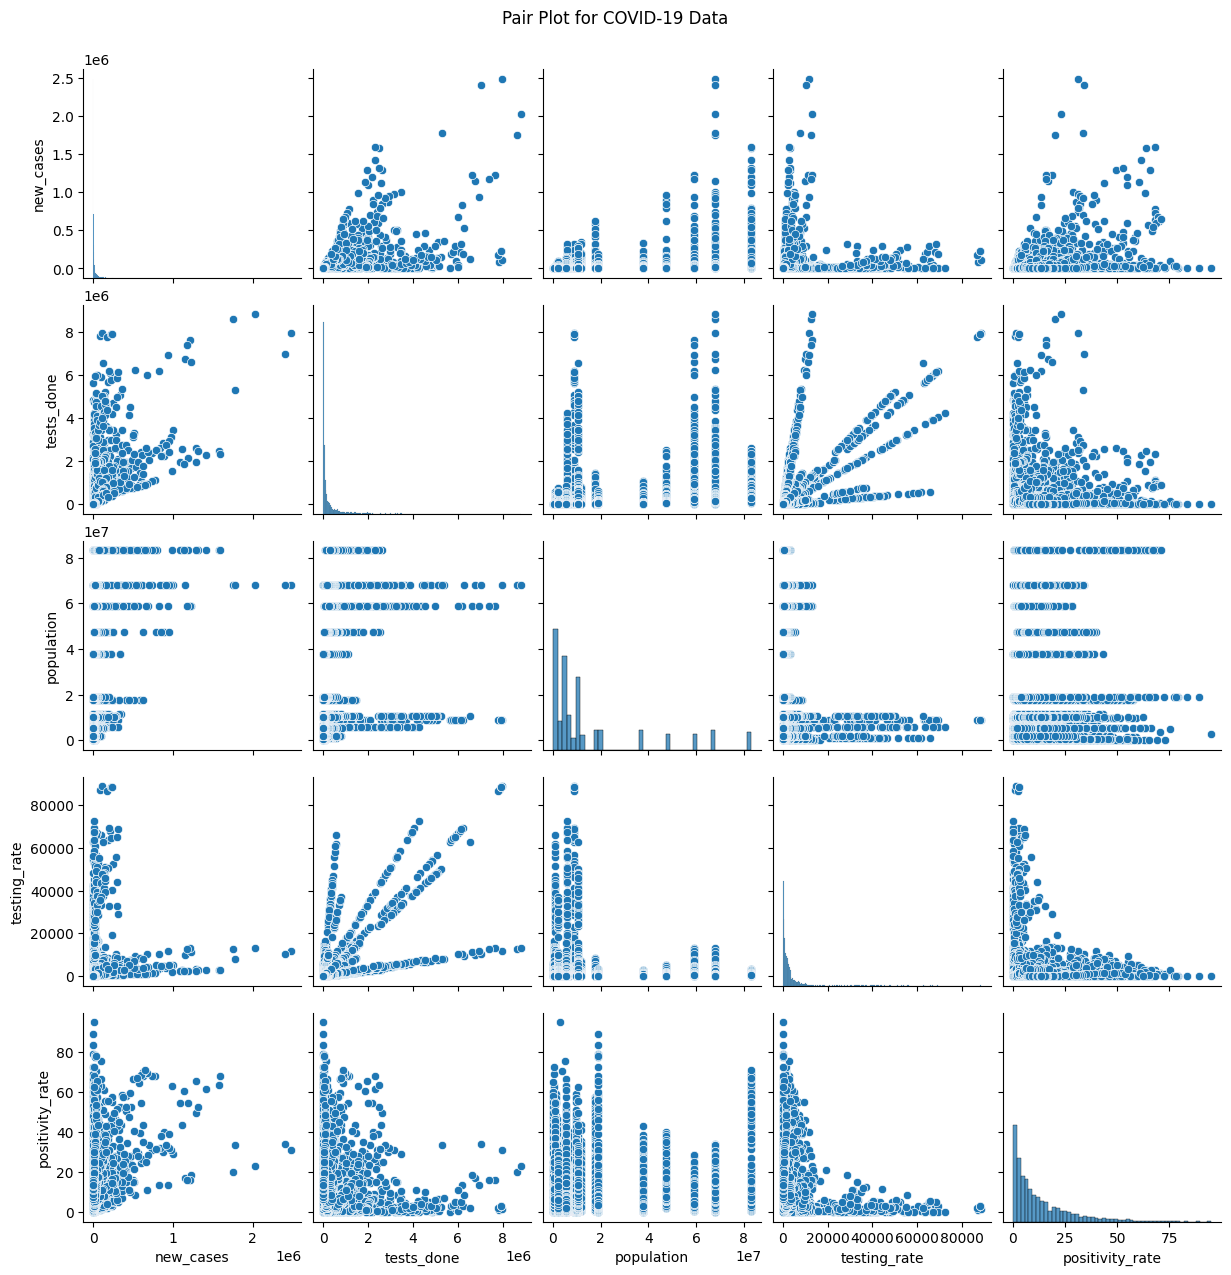

In [18]:
# Seaborn pair plot 
sns.pairplot(covid_df)
plt.suptitle('Pair Plot for COVID-19 Data', y=1.02)
plt.show()

In [19]:
# Since columns has same type of data we are dropping the columns
columns_to_drop = ['country_code', 'region', 'region_name'] 
covid_df = covid_df.drop(columns_to_drop, axis=1)

In [ ]:
covid_df.head()

,country,year_week,level,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source
0,Austria,2020-W41,national,7487.0,124663.0,8978929,1388.394986,6.005792,TESSy COVID-19
1,Austria,2020-W42,national,9898.0,129647.0,8978929,1443.902719,7.634577,TESSy COVID-19
2,Austria,2020-W43,national,18262.0,158997.0,8978929,1770.779121,11.485751,TESSy COVID-19
3,Austria,2020-W44,national,31613.0,167926.0,8978929,1870.223052,18.825554,TESSy COVID-19
4,Austria,2020-W45,national,44772.0,199567.0,8978929,2222.614746,22.434571,TESSy COVID-19


In [20]:
# Since testing_data_source and level has no meaning to the data set we are dropping the columns
columns_to_drop = ['level', 'testing_data_source']
covid_df = covid_df.drop(columns_to_drop, axis=1)

In [21]:
covid_df.head()

,country,year_week,new_cases,tests_done,population,testing_rate,positivity_rate
0,Austria,2020-W41,7487.0,124663.0,8978929,1388.394986,6.005792
1,Austria,2020-W42,9898.0,129647.0,8978929,1443.902719,7.634577
2,Austria,2020-W43,18262.0,158997.0,8978929,1770.779121,11.485751
3,Austria,2020-W44,31613.0,167926.0,8978929,1870.223052,18.825554
4,Austria,2020-W45,44772.0,199567.0,8978929,2222.614746,22.434571


In [22]:
# Encoding the country and year_week by using label encoder
label_encoder = LabelEncoder()
covid_df['country'] = label_encoder.fit_transform(covid_df['country'])
covid_df['year_week'] = label_encoder.fit_transform(covid_df['year_week'])

In [23]:
X = covid_df.drop('new_cases', axis=1)
y = covid_df['new_cases']

In [24]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Scaling the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree

In [26]:
# Creating and Converting the features into Decision Tree Regressor Model
covid_dt = DecisionTreeRegressor()

# Fit the model
covid_dt.fit(X_train, y_train)

# Predicting the target based on the test data
y_pred = covid_dt.predict(X_test)

# Calculating MSE and R-squared score and accuracy in percentage
covid_dt_mse = mean_squared_error(y_test, y_pred)
covid_dt_r2 = r2_score(y_test, y_pred)
covid_dt_accuracy = covid_dt.score(X_test, y_test) * 100

print("Mean Squared Error for Decision tree: {:.2f}".format(covid_dt_mse))
print("R-squared Score for Decision tree : {:.2f}".format(covid_dt_r2))
print("Accuracy for Decision tree : {:.2f}%".format(covid_dt_accuracy))

Mean Squared Error for Decision tree: 1536982146.59
R-squared Score for Decision tree : 0.93
Accuracy for Decision tree : 93.28%


# Random Forest

In [27]:
# Creating and Converting the features in to Random Forest Regressor
covid_RF = RandomForestRegressor()

# fitting the data
covid_RF.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = covid_RF.predict(X_test)

# Calculating MSE and R-squared score
covid_RF_mse = mean_squared_error(y_test, y_pred)
covid_RF_r2 = r2_score(y_test, y_pred)

# Calculating accuracy in percentage
covid_RF_accuracy = covid_RF.score(X_test, y_test) * 100

print("Mean Squared Error of Random Forest Regressor: {:.2f}".format(covid_RF_mse))
print("R-squared Score of Random Forest Regressor: {:.2f}".format(covid_RF_r2))
print("Accuracy of Random Forest Regressor: {:.2f}%".format(covid_RF_accuracy))

Mean Squared Error of Random Forest Regressor: 1642031849.75
R-squared Score of Random Forest Regressor: 0.93
Accuracy of Random Forest Regressor: 92.83%


# SVM

In [28]:
# Initializing the parameters for SVM
PARAM_SVM_R = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.01, 0.001, 0.0001],
    'kernel': ['poly'],
    'gamma': ['scale'],
    'degree': [2, 3, 4, 5],
}

In [29]:
# Creating and Converting the features in to SVM Regressor
covid_svr = SVR()
grid_search = GridSearchCV(covid_svr, PARAM_SVM_R, cv=5)
# fitting the data
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4, 5],
                         'epsilon': [0.1, 0.01, 0.001, 0.0001],
                         'gamma': ['scale'], 'kernel': ['poly']})

In [30]:
# Print the best SVR values for the model
best_svr = grid_search.best_estimator_
print(best_svr)

# Make predections based on the test details
y_pred = best_svr.predict(X_test_scaled)

# Caluculating MSE, r2 and accuracy
svr_mse = mean_squared_error(y_test, y_pred)
svr_r2 = r2_score(y_test, y_pred)
svr_accuracy = best_svr.score(X_test_scaled, y_test) * 100

print("Mean Squared Error of SVR :", svr_mse)
print("R-squared Score of SVR:", svr_r2)
print("Accuracy of SVR:", svr_accuracy)

SVR(C=100, degree=5, epsilon=0.0001, kernel='poly')
Mean Squared Error of SVR : 4156984234.408998
R-squared Score of SVR: 0.8183735111909954
Accuracy of SVR: 81.83735111909954
